<a href="https://colab.research.google.com/github/KL193/DR_Research/blob/main/DR_Metadata_Synthesis_and_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os


os.makedirs('/content/drive/My Drive/DR_Project/data', exist_ok=True)

# Saving  the synthetic data csv
df.to_csv('/content/drive/My Drive/DR_Project/data/full_dataset_with_metadata.csv', index=False)



In [ ]:

!pip install -q torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

!pip install -q efficientnet-pytorch==0.7.1


!pip install -q grad-cam


!pip install -q xgboost shap scikit-learn pandas numpy matplotlib seaborn torchsummary


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 49.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
# Basic setup
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.models import resnet50

from efficientnet_pytorch import EfficientNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import xgboost as xgb
import shap
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import joblib
from PIL import Image

# Reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Using device: cpu
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading full dataset

csv_path = '/content/drive/My Drive/DR_Project/data/full_dataset_with_metadata.csv'
df = pd.read_csv(csv_path)

In [ ]:
print("Columns:", df.columns.tolist())
print(df.head())

Columns: ['id_code', 'diagnosis', 'adjudicated_dme', 'adjudicated_gradable', 'age', 'hba1c', 'duration', 'sbp']
                      id_code  diagnosis  adjudicated_dme  \
0  20051020_43808_0100_PP.png          0                0   
1  20051020_43832_0100_PP.png          1                0   
2  20051020_43882_0100_PP.png          1                0   
3  20051020_43906_0100_PP.png          2                1   
4  20051020_44261_0100_PP.png          0                0   

   adjudicated_gradable   age  hba1c  duration    sbp  
0                     1  53.4    5.7       3.0  113.1  
1                     1  36.8    6.7       5.2  145.5  
2                     1  56.6    7.5       7.8  126.0  
3                     1  58.0    6.9      18.0  147.3  
4                     1  49.4    6.8       4.1  112.2  


Image 0: 20051020_43808_0100_PP.png → Exists? True


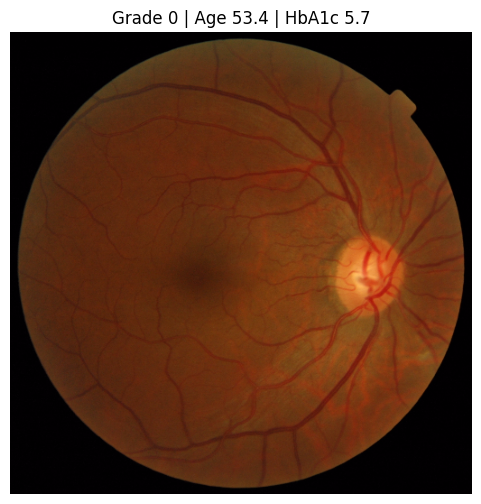

Image 1: 20051020_43832_0100_PP.png → Exists? True


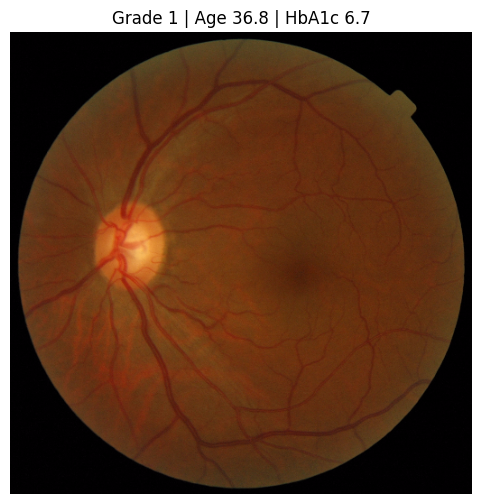

Image 2: 20051020_43882_0100_PP.png → Exists? True


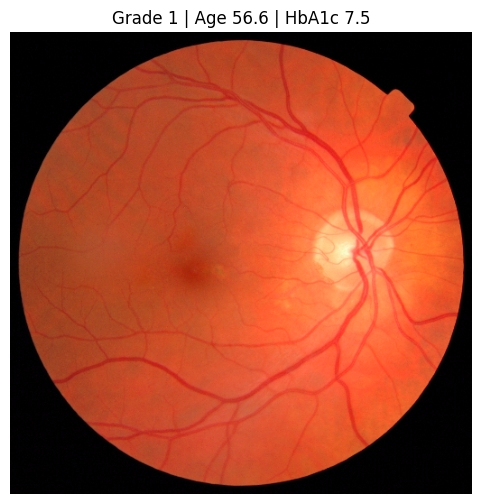

In [ ]:

import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt


csv_path = '/content/drive/My Drive/DR_Project/data/full_dataset_with_metadata.csv'
df = pd.read_csv(csv_path)


df['filename'] = df['id_code']
image_dir = '/content/drive/My Drive/DR_Project/dataset/messidor2/preprocess'

# Test first 3 images
for i in range(3):
    path = os.path.join(image_dir, df.iloc[i]['filename'])
    print(f"Image {i}: {df.iloc[i]['filename']} → Exists? {os.path.exists(path)}")

    if os.path.exists(path):
        img = Image.open(path)
        plt.figure(figsize=(6,6))
        plt.imshow(img)
        plt.title(f"Grade {df.iloc[i]['diagnosis']} | Age {df.iloc[i]['age']} | HbA1c {df.iloc[i]['hba1c']}")
        plt.axis('off')
        plt.show()
    else:
        print("Still not found — check folder path!")

# Standerize metadata

# Install All dependecies

In [ ]:
!pip install -q torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install -q efficientnet-pytorch==0.7.1
!pip install -q grad-cam
!pip install -q xgboost shap scikit-learn pandas numpy matplotlib seaborn torchsummary


# Importing Libraries and basic setup

In [ ]:
import os
import random
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image
from google.colab import drive

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import torchvision.transforms as transforms

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score
)

from efficientnet_pytorch import EfficientNet
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
import xgboost as xgb

# Reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cpu


# Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Data set

---



In [4]:
import pandas as pd

path = '/content/drive/My Drive/DR_Project/dataset/messidor2/messidor_data.csv'
df = pd.read_csv(path)
df.head()


,id_code,diagnosis,adjudicated_dme,adjudicated_gradable
0,20051020_43808_0100_PP.png,0,0,1
1,20051020_43832_0100_PP.png,1,0,1
2,20051020_43882_0100_PP.png,1,0,1
3,20051020_43906_0100_PP.png,2,1,1
4,20051020_44261_0100_PP.png,0,0,1


In [5]:
import os

image_dir = '/content/drive/My Drive/DR_Project/dataset/messidor2/preprocess'
print("Total images:", len(os.listdir(image_dir)))
print("Example images:", os.listdir(image_dir)[:5])


Total images: 1744
Example images: ['20060411_61702_0200_PP.png', '20060411_61901_0200_PP.png', '20060411_62036_0200_PP.png', '20060411_62298_0200_PP.png', '20060412_52038_0200_PP.png']


# Metadata Synthetic

In [7]:

import numpy as np
import random


def generate_metadata(dr_grade):
    # Base ranges (realistic values based on DR severity)
    if dr_grade == 0:
        age = np.random.normal(45, 10)
        hba1c = np.random.normal(6.0, 0.5)
        duration = np.random.normal(3, 2)
        sbp = np.random.normal(120, 10)
    elif dr_grade == 1:
        age = np.random.normal(50, 10)
        hba1c = np.random.normal(7.0, 0.6)
        duration = np.random.normal(6, 3)
        sbp = np.random.normal(130, 12)
    elif dr_grade == 2:
        age = np.random.normal(55, 10)
        hba1c = np.random.normal(7.8, 0.7)
        duration = np.random.normal(10, 4)
        sbp = np.random.normal(140, 12)
    elif dr_grade == 3:
        age = np.random.normal(60, 8)
        hba1c = np.random.normal(8.6, 0.8)
        duration = np.random.normal(14, 5)
        sbp = np.random.normal(150, 15)
    else:  # Grade 4
        age = np.random.normal(65, 8)
        hba1c = np.random.normal(9.4, 0.9)
        duration = np.random.normal(18, 5)
        sbp = np.random.normal(160, 15)

    return round(age,1), round(hba1c,1), round(duration,1), round(sbp,1)


metadata = df['diagnosis'].apply(lambda x: generate_metadata(x))
metadata_df = pd.DataFrame(metadata.tolist(), columns=['age','hba1c','duration','sbp'])
df = pd.concat([df, metadata_df], axis=1)

print("Synthetic metadata added successfully!")
df[['id_code', 'diagnosis', 'age', 'hba1c', 'duration', 'sbp']].head(10)

Synthetic metadata added successfully!


,id_code,diagnosis,age,hba1c,duration,sbp
0,20051020_43808_0100_PP.png,0,39.7,6.7,0.3,138.7
1,20051020_43832_0100_PP.png,1,51.6,5.9,4.1,159.7
2,20051020_43882_0100_PP.png,1,43.4,6.6,9.0,130.6
3,20051020_43906_0100_PP.png,2,52.2,7.8,16.4,125.3
4,20051020_44261_0100_PP.png,0,49.1,5.5,4.4,112.4
5,20051020_44284_0100_PP.png,0,44.0,6.1,3.6,94.2
6,20051020_44338_0100_PP.png,0,62.1,7.0,4.8,130.3
7,20051020_44349_0100_PP.png,2,43.8,7.8,10.6,121.4
8,20051020_44400_0100_PP.png,0,51.5,5.3,3.1,120.4
9,20051020_44431_0100_PP.png,0,38.6,6.1,2.9,132.8
